# Tutorial 5 - Python For Data Analysis 🐍 

---

## Scikit Learn 💫

### *Table of Contents*

- Supervised Learning 🔎
  - [Exercise 1](#exercise-1) 
  - [Exercice 2](#exercise-2) 

## Requirements

In [ ]:
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import discriminant_analysis
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Supervised Learning

### Exercice 1
---

#### 1) Load and return the boston dataset from sklearn.datasets

In [ ]:
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

#### 2) Split the boston dataset into train data and test data

In [ ]:
x, y = boston.data, boston.target
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.33)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


#### 3) Standardize the data.

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### 4) Train or fit the data into a model using the Support Vector Machine Learning algorithm and test it.

In [ ]:
clf = svm.SVR(kernel='linear')
clf.fit(x_train_scaled, y_train)
y_pred_svm = clf.predict(x_test_scaled)

#### 5) Select the best hyperparameters of the model using GridSearch.

In [ ]:
#Can take a few seconds
svc = svm.SVR()
gammaList = np.arange(0.01,1,0.01) #List of gamma between 0.01 and 1
parameters = {'gamma':gammaList,'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(svc, parameters)
clf.fit(x_train_scaled, y_train)
print("Best score: ", clf.best_score_,"\nBest estimator: ", clf.best_estimator_)
y_pred_svm_best_hyperparameters = clf.predict(x_test_scaled) #Prediction

Best score:  0.7925784171011652 
Best estimator:  SVR(C=10, gamma=0.04)


#### 6) Create a function to test the different hyperparameters.

It has been done in the previous question.

#### 7) Train or fit the data using other algorithms.

In [ ]:
#Linear Regression
model=sklearn.linear_model.LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred_LinearR = model.predict(x_test_scaled) #Prediction

In [ ]:
#Huber Regressor
model=sklearn.linear_model.HuberRegressor()
model.fit(x_train_scaled,y_train)
y_pred_HuberR = model.predict(x_test_scaled) #Prediction

In [ ]:
#Bagging Regressor
model=sklearn.ensemble.BaggingRegressor()
model.fit(x_train_scaled,y_train)
y_pred_BaggingRegressor = model.predict(x_test_scaled) #Prediction

In [ ]:
#Ada Boost Regressor
model=sklearn.ensemble.AdaBoostRegressor()
model.fit(x_train_scaled,y_train)
y_pred_AdaBoostRegressor = model.predict(x_test_scaled) #Prediction

In [ ]:
#Random Forest Regressor
model=sklearn.ensemble.RandomForestRegressor()
model.fit(x_train_scaled,y_train)
y_pred_RandomForestRegressor = model.predict(x_test_scaled) #Prediction

In [ ]:
#Hist Gradient Boosting Regressor
model=sklearn.ensemble.HistGradientBoostingRegressor()
model.fit(x_train_scaled,y_train)
y_pred_HistGradientBoostingRegressor = model.predict(x_test_scaled) #Prediction

#### 8) Compare the performance of the different algorithms. Which is the best Model ?

In [ ]:
tabResult_regression = []
#Adding the Name and the Explained Variance Score score for each model fitted
tabResult_regression.append(["SVM",metrics.explained_variance_score(y_test, y_pred_svm)])
tabResult_regression.append(["SVM best hyperparameters",metrics.explained_variance_score(y_test, y_pred_svm_best_hyperparameters)])
tabResult_regression.append(["Linear Regression",metrics.explained_variance_score(y_test, y_pred_LinearR)])
tabResult_regression.append(["Huber Regression",metrics.explained_variance_score(y_test, y_pred_HuberR)])
tabResult_regression.append(["Bagging",metrics.explained_variance_score(y_test, y_pred_BaggingRegressor)])
tabResult_regression.append(["Ada Boost",metrics.explained_variance_score(y_test, y_pred_AdaBoostRegressor)])
tabResult_regression.append(["Random Forest",metrics.explained_variance_score(y_test, y_pred_RandomForestRegressor)])
tabResult_regression.append(["Hist Gradient Boosting",metrics.explained_variance_score(y_test, y_pred_HistGradientBoostingRegressor)])

#Putting the informations of the Variance Score in a DataFrame to make it more visual and see which is the best model
dfResult_regression = pd.DataFrame(tabResult_regression,columns=('Model','Variance Score'))
dfResult_regression = dfResult_regression.sort_values(by='Variance Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Greens').set_caption('Summary of Models experimented and their Score')
dfResult_regression

,Model,Variance Score
0,Hist Gradient Boosting,0.909887
1,Random Forest,0.890149
2,Bagging,0.882382
3,Ada Boost,0.848714
4,SVM best hyperparameters,0.820269
5,Linear Regression,0.740971
6,SVM,0.721709
7,Huber Regression,0.721084


In [ ]:
dfResult_regression = dfResult_regression.data

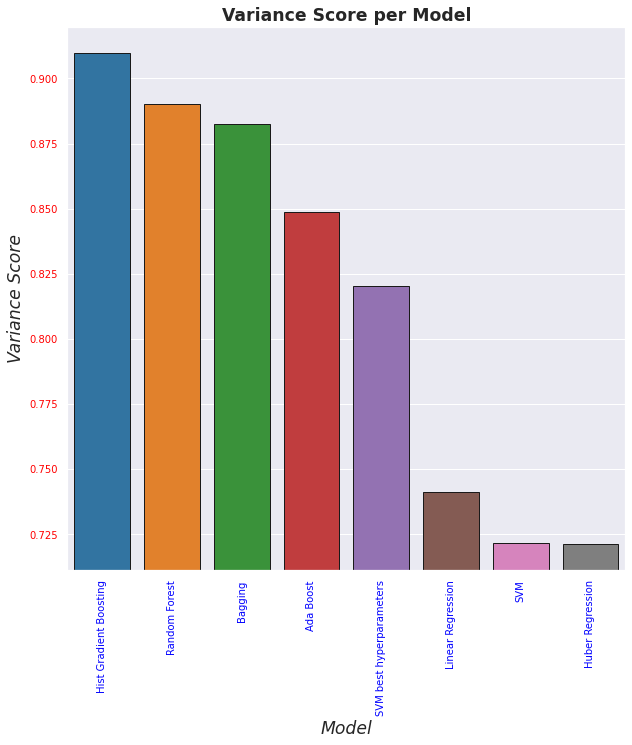

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
axis = sns.barplot(dfResult_regression['Model'],dfResult_regression['Variance Score'],palette = 'tab10',edgecolor = 'k')
plt.title("Variance Score per Model", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Model", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Variance Score", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)
plt.ylim(min(dfResult_regression['Variance Score'])-0.01,max(dfResult_regression['Variance Score'])+0.01)
plt.show()

The best model seems to be the Hist Gradient Boosting and Random Forest in second.

### Exercice 2
---

#### 1) Load and return the dataset titanic from pandas library.

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.fillna(0, inplace = True)
df['Survived'] = df['Survived'].map({0: 'Died',1: 'Survived'})
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,Died,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


#### 2) Use different machine learning models to predict the survival of titanic passengers.

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['Pclass','Age','Sex']],df['Survived'],test_size=0.33)

In [ ]:
#Logistic Regression
model=sklearn.linear_model.LogisticRegression()
model.fit(x_train,y_train)
y_pred_LogisticR = model.predict(x_test) #Prediction

In [ ]:
#Linear Discriminant Analysis
model=sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
model.fit(x_train,y_train)
y_pred_LinearDiscriminantAnalysis = model.predict(x_test) #Prediction

In [ ]:
#Quadratic Discriminant Analysis
model=sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
model.fit(x_train,y_train)
y_pred_QuadraticDiscriminantAnalysis = model.predict(x_test) #Prediction

In [ ]:
#Bagging
model=sklearn.ensemble.BaggingClassifier()
model.fit(x_train,y_train)
y_pred_Bagging = model.predict(x_test) #Prediction

In [ ]:
#Extra Trees Classifier
model=sklearn.ensemble.ExtraTreesClassifier()
model.fit(x_train,y_train)
y_pred_ExtraTreesClassifier = model.predict(x_test) #Prediction

In [ ]:
#Random Forest Classifier
model=sklearn.ensemble.RandomForestClassifier()
model.fit(x_train,y_train)
y_pred_RandomForestClassifier = model.predict(x_test) #Prediction

In [ ]:
#Hist Gradient Boosting Classifier
model=sklearn.ensemble.HistGradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred_HistGradientBoostingClassifier = model.predict(x_test) #Prediction

In [ ]:
#Ada Boost Classifier
model=sklearn.ensemble.AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred_AdaBoostClassifier = model.predict(x_test) #Prediction

In [ ]:
tabResult_classification = []
#Adding the Name and the Accuracy score for each model fitted
tabResult_classification.append(["Logistic Regression",metrics.accuracy_score(y_test, y_pred_LogisticR)])
tabResult_classification.append(["Linear Discriminant Analysis",metrics.accuracy_score(y_test, y_pred_LinearDiscriminantAnalysis)])
tabResult_classification.append(["Quadratic Discriminant Analysis",metrics.accuracy_score(y_test, y_pred_QuadraticDiscriminantAnalysis)])
tabResult_classification.append(["Bagging",metrics.accuracy_score(y_test, y_pred_Bagging)])
tabResult_classification.append(["Extra Trees Classifier",metrics.accuracy_score(y_test, y_pred_ExtraTreesClassifier)])
tabResult_classification.append(["Random Forest Classifier",metrics.accuracy_score(y_test, y_pred_RandomForestClassifier)])
tabResult_classification.append(["Hist Gradient Boosting Classifier",metrics.accuracy_score(y_test, y_pred_HistGradientBoostingClassifier)])
tabResult_classification.append(["Ada Boost Classifier",metrics.accuracy_score(y_test, y_pred_AdaBoostClassifier)])

#### 3) Which is the best model?

In [ ]:
#Putting the informations of the Accuracy in a DataFrame to make it more visual and see which is the best model
dfResult_classification = pd.DataFrame(tabResult_classification,columns=('Model','Accuracy'))
dfResult_classification = dfResult_classification.sort_values(by="Accuracy",ascending=False,ignore_index=True).style.background_gradient(cmap='Blues').set_caption('Summary of Models experimented and their Accuracy')
dfResult_classification

,Model,Accuracy
0,Extra Trees Classifier,0.827119
1,Hist Gradient Boosting Classifier,0.827119
2,Random Forest Classifier,0.810169
3,Quadratic Discriminant Analysis,0.806780
4,Ada Boost Classifier,0.800000
5,Bagging,0.796610
6,Logistic Regression,0.793220
7,Linear Discriminant Analysis,0.786441


In [ ]:
dfResult_classification = dfResult_classification.data

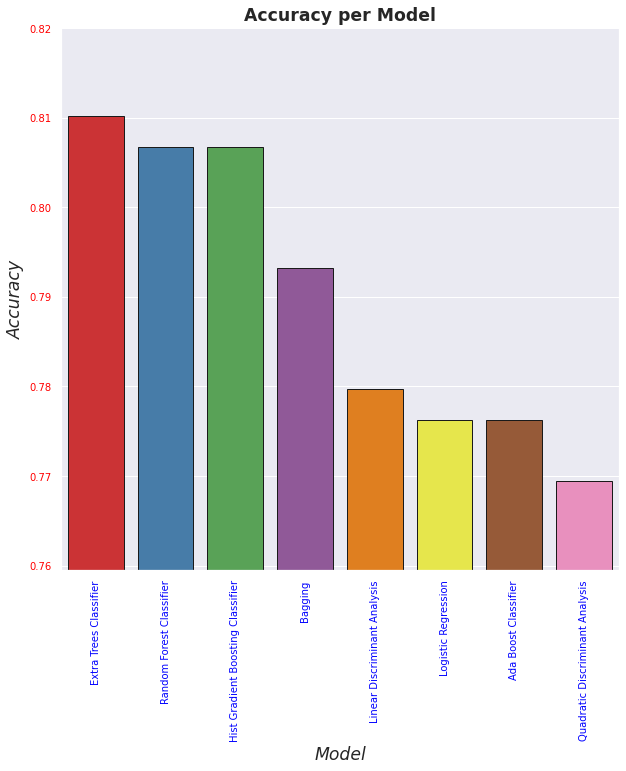

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
axis = sns.barplot(dfResult_classification['Model'],dfResult_classification['Accuracy'],palette = 'Set1',edgecolor = 'k')
plt.title("Accuracy per Model", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Model", fontsize='x-large', fontstyle = "italic")
plt.ylabel("Accuracy", fontsize='x-large', fontstyle = "italic")
properties1 = {"rotation" : 90, "color":"blue", "fontsize":"smaller"}
plt.setp(axis.get_xticklabels(), **properties1)
properties2 = {"rotation" : 0, "color":"red", "fontsize":"smaller"}
plt.setp(axis.get_yticklabels(), **properties2)
plt.ylim(min(dfResult_classification['Accuracy'])-0.01,max(dfResult_classification['Accuracy'])+0.01)
plt.show()

The best models seems to be Extra Trees and Random Forest.